In [121]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [122]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [123]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [124]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [125]:
df_market_data.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [126]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_market_data)

# predict/transform
scaled_data = scaler.transform(df_market_data)



In [127]:
# Copy column names
scaled_columns = ['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']

# Create a DataFrame with the scaled data with original column names and index
df_scaled = pd.DataFrame(scaled_data, columns = scaled_columns, index=df_market_data.index)


# Display sample data
df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [128]:
# Create a list with the number of k-values from 1 to 11
k_list = list(range(1, 12))

In [129]:
# Create an empty list to store the inertia values
inertia_values = []

# Define your "X" - features to predict
X = df_scaled

# Create a for loop to compute the inertia with each possible value of k
for i in k_list:
    
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
# 2. Fit the model to the data using `df_scaled`
    k_model.fit(X)
# 3. predict the model
    preds = k_model.predict(X)
# 4. Append the model.inertia_ to the inertia list
    inertia_values.append(k_model.inertia_)
    
    print(f"Finished {i} out of {max(k_list)}")

Finished 1 out of 11
Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [130]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_list, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668
5,6,53.057788
6,7,44.406791
7,8,37.078233
8,9,32.832187
9,10,28.165433


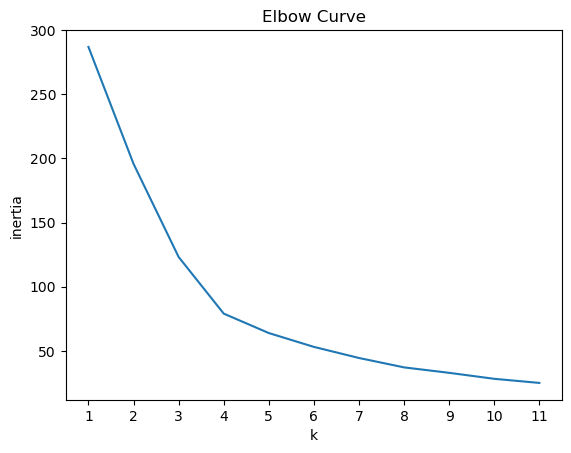

In [131]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** The best value for k is probaly 4 as we see a strong elbow in the graph at this k value

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [132]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [133]:
# Fit the K-Means model using the scaled data
model.fit(X)


KMeans(n_clusters=4, random_state=1)

In [134]:
# Predict the clusters to group the cryptocurrencies using the scaled data
preds = model.predict(X)

# Print the resulting array of cluster values.
print(preds)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [135]:
# Create a copy of the DataFrame
df_2 = df_market_data.copy()

In [136]:
# Add a new column to the DataFrame with the predicted clusters
df_2['predicted_clusters'] = preds

# Display sample data
df_2

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_clusters
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,2
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,2
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,0
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,0
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,2
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195,2
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186,2
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756,2
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408,2


In [137]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

k_scatter_plot = df_2.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c= "predicted_clusters",
    hover_cols=["coin_id"],
    cmap='viridis'
)

k_scatter_plot


:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_clusters,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [138]:
# Create a PCA model instance and set `n_components=3`.
pca=PCA(n_components=3)

In [139]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
crypto_pca = pca.fit_transform(df_2)

# View the first five rows of the DataFrame. 
crypto_pca[:5]

array([[-341.80061339,  -51.36731801,   12.52616158],
       [-249.4201205 ,   24.11700952,  -14.2307741 ],
       [-402.61490071, -118.71047826,   24.83804813],
       [-406.75261705,  -79.48703113,    1.56601942],
       [-382.42959701, -103.43250343,   16.75382768]])

In [140]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([9.76036823e-01, 2.30282854e-02, 7.48307966e-04])

In [141]:
# Calculate the total of values in the array using the sum() function
total = sum(variance_ratio)

# Print the total
print("Total:", total)

Total: 0.9998134167981791


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.9998134167981791

In [142]:
# Create a new DataFrame with the PCA data and setting the index as the original coin_id.
pca_df = pd.DataFrame(
    crypto_pca,
    columns=["PCA1", "PCA2", "PCA3"], 
    index=df_2.index
)
# Display sample data
pca_df.head(10)

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-341.800613,-51.367318,12.526162
ethereum,-249.420121,24.117010,-14.230774
tether,-402.614901,-118.710478,24.838048
ripple,-406.752617,-79.487031,1.566019
bitcoin-cash,-382.429597,-103.432503,16.753828
binancecoin,-289.124673,12.286629,34.164482
chainlink,28.151744,154.987476,-73.125776
cardano,-174.519489,80.242958,-30.392089
litecoin,-406.612990,-91.783575,5.016838


---

### Find the Best Value for k Using the PCA Data

In [143]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1,12))

In [144]:
X = pca_df

# Create an empty list to store the inertia values
inertia_values_2 = []

# Create a for loop to compute the inertia with each possible value of k
for i in k_values:
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
    k_model = KMeans(n_clusters=i, random_state=1)
# 2. Fit the model to the data using `df_scaled`
    k_model.fit(X)
# 3. predict the model
    preds = k_model.predict(X)
# 4. Append the model.inertia_ to the inertia list
    inertia_values_2.append(k_model.inertia_)
    
    print(f"Finished {i} out of {max(k_list)}")

Finished 1 out of 11
Finished 2 out of 11
Finished 3 out of 11
Finished 4 out of 11
Finished 5 out of 11
Finished 6 out of 11
Finished 7 out of 11
Finished 8 out of 11
Finished 9 out of 11
Finished 10 out of 11
Finished 11 out of 11


In [145]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_list, "inertia": inertia_values_2}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_2 = pd.DataFrame(elbow_data)
df_elbow_2

,k,inertia
0,1,6.997052e+07
1,2,8.180192e+06
2,3,2.580721e+06
3,4,8.237467e+05
4,5,4.264172e+05
5,6,2.592095e+05
6,7,1.897977e+05
7,8,1.472963e+05
8,9,1.086862e+05
9,10,8.556348e+04


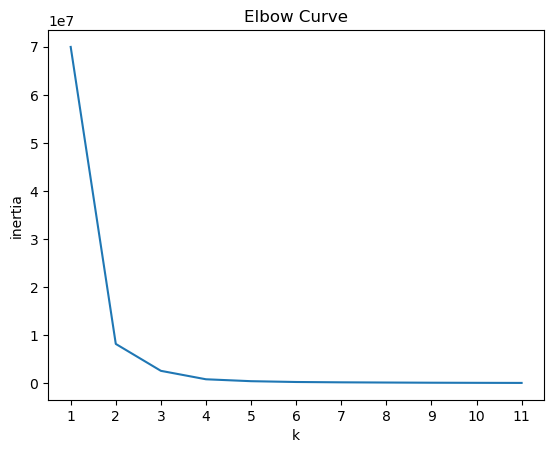

In [146]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(df_elbow_2["k"], df_elbow_2["inertia"])
plt.title("Elbow Curve")
plt.xticks(df_elbow_2["k"])
plt.ylabel("inertia")
plt.xlabel("k")
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 2 maybe 3


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes the original data the k value was 4.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [147]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=2, random_state=1)

In [148]:
# Fit the K-Means model using the PCA data
model.fit(X)

KMeans(n_clusters=2, random_state=1)

In [149]:
# Predict the clusters to group the cryptocurrencies using the PCA data
preds = model.predict(X)

# Print the resulting array of cluster values.
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [150]:
# Create a copy of the DataFrame with the PCA data
pca_copy_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_copy_df['predicted_clusters'] = preds

# Display sample data
pca_copy_df

,PCA1,PCA2,PCA3,predicted_clusters
coin_id,,,,
bitcoin,-341.800613,-51.367318,12.526162,0
ethereum,-249.420121,24.117010,-14.230774,0
tether,-402.614901,-118.710478,24.838048,0
ripple,-406.752617,-79.487031,1.566019,0
bitcoin-cash,-382.429597,-103.432503,16.753828,0
binancecoin,-289.124673,12.286629,34.164482,0
chainlink,28.151744,154.987476,-73.125776,0
cardano,-174.519489,80.242958,-30.392089,0
litecoin,-406.612990,-91.783575,5.016838,0


In [151]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
pca_scatter_plot = pca_copy_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c= "predicted_clusters",
    hover_cols=["coin_id"],
    cmap='winter'
)

pca_scatter_plot


:Scatter   [PCA1]   (PCA2,predicted_clusters,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [163]:
# Composite plot to contrast the Elbow curves
# Create line plots for each DataFrame
line_plot1 = df_elbow.hvplot.line(x='k', y='inertia', label='All Features', color='blue', ylim=(0, 300))
line_plot2 = df_elbow_2.hvplot.line(x='k', y='inertia', label='PCA', color='red')

# Create a composite plot by overlaying the line plots
composite_plot = line_plot1 + line_plot2

composite_plot

:Layout
   .Curve.All_Features :Curve   [k]   (inertia)
   .Curve.PCA          :Curve   [k]   (inertia)

In [162]:
# Composite plot to contrast the clusters
composite_plot_2 = pca_scatter_plot + k_scatter_plot

composite_plot_2

:Layout
   .Scatter.I  :Scatter   [PCA1]   (PCA2,predicted_clusters,coin_id)
   .Scatter.II :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,predicted_clusters,coin_id)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** When you use less features to cluster the data using K-Means there is less distinction found in the data which means less clusters created which may make it harder to make conclusions on classification.